- We saw that the sum of a large number $n$ of independent *discrete* random variables with mean $\mu$ and standard deviation $\sigma$ tends to look like a normal distribution with mean $n\mu$ and standard deviation $\sqrt{n}\sigma$

- This is true for any random variable, and **also applies to continuous distributions**

- We can show this for the continuous uniform distribution

In [60]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 10
from scipy.stats import norm, t

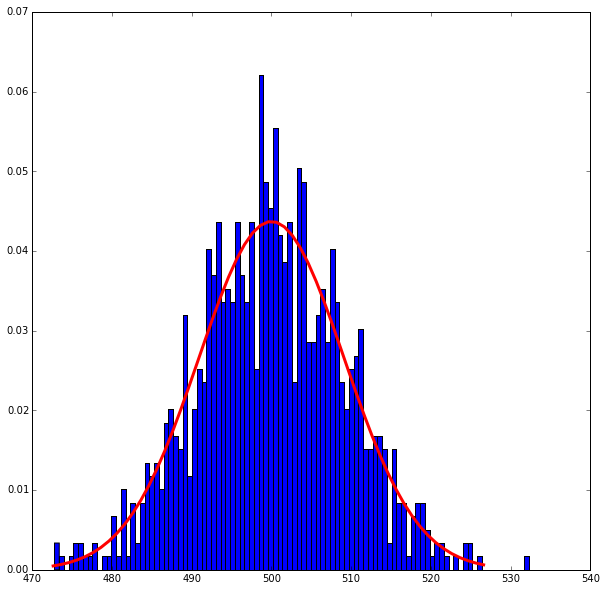

In [41]:
n = 1000
n_trials = 1000

random_array = np.random.uniform(size = [n, n_trials])
sum_array = np.sum(random_array, axis = 0)

mu = n*0.5
sigma = np.sqrt(n)/np.sqrt(12)

x = np.arange(mu - 3*sigma, mu + 3*sigma)
norm_array = norm.pdf(x, loc = mu, scale = sigma)

plt.hist(sum_array, bins = 100, normed = True)
plt.plot(x, norm_array, color = 'r', lw = 3)
plt.show()

## Example - Exponential Distribution

- Let's take random values from the **exponential distribution**

- **Recall**:

$ E(X_{i}) = \int_{0}^{\infty}\lambda x e^{-\lambda x}dx = -\frac{e^{-\lambda x}(\lambda x+1)}{\lambda}|^{\infty}_{0} = \frac{1}{\lambda}$

$E(X_{i}^{2}) = \int_{0}^{\infty}\lambda x^{2} e^{-\lambda x}dx = -\frac{e^{\lambda x}(\lambda^{2}x^{2} + 2\lambda x + 2)}{\lambda ^{2}} = \frac{2}{\lambda^{2}}$

$\implies V(X) = \frac{2}{\lambda^{2}} - \frac{1}{\lambda^{2}} = \frac{1}{\lambda^{2}}$

### Then $E(S_{n}) = \frac{n}{\lambda}$ and $V(S_{n}) = \frac{n}{\lambda^{2}}$

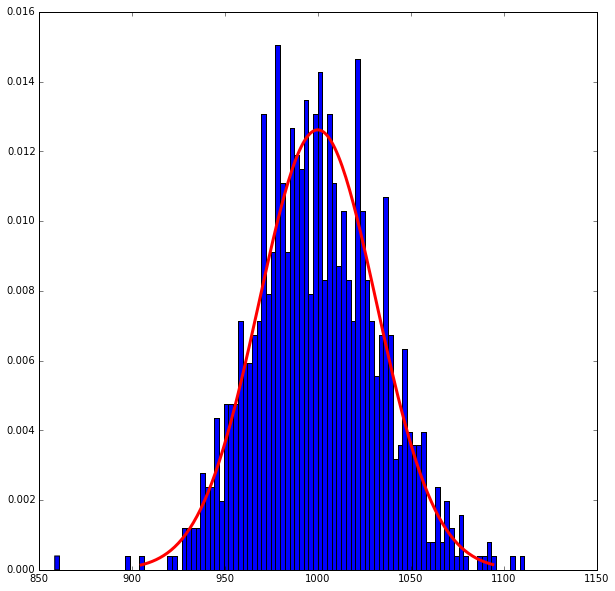

In [47]:
n = 1000
n_trials = 1000

lamb = 1

mu = n/lamb
sigma = np.sqrt(n)/lamb

random_array = np.random.exponential(scale = 1, size = [n, n_trials])
sum_array = np.sum(random_array, axis = 0)

x = np.arange(mu - 3*sigma, mu + 3*sigma)
norm_array = norm.pdf(x, loc = mu, scale = sigma)

plt.hist(sum_array, bins = 100, normed = True)
plt.plot(x, norm_array, color = 'r', lw = 3)
plt.show()

_____

## Example

### Suppose a surveyor wants to measure a know distance (say 1 mile) using a transit and some method of triangulation

### He knows that because of possible motion of the transit, atmospheric distortions, human error, etc., any one measure will likely be off at least slightly

### He plans to make several measurements and take an average

### He assumes that his measurements are independent random variables with $\mu = 1$ and $\sigma = 0.0002$

## What can he say about the average?

### If $n$ is large, then $E(A_{n}) = \mu = 1$ and $\sigma_{A_{n}} = \frac{0.0002}{\sqrt{n}}$

### If he wants the accuracy of his measurement to be within 0.0001 of a true mile, what is the 95% confidence interval?

### For the normal distribution, 95% of values lie within 1.96 standard deviations

### $\implies 1.96 = \frac{0.0001}{\frac{0.0002}{\sqrt{n}}} = 0.5\sqrt{n} \implies n \approx 16$

### Therefore, if he makes 16 measurements, he can be pretty confident in the accuracy of his avg measurement

## As a rule of thumb, we can be confident the normal distribution is a good approximation for $S_{n}$ when $n\geq 30$

_______

# Estimating the mean

## Example continued

### Suppose the surveyor takes 36 measurements and averages them. How confident can he be that he's measuring the true value within 0.0002?

### $\mu = 1$ and $\sigma = \frac{0.0002}{\sqrt{36}} = \frac{0.0002}{6}$

### Therefore, if the true value is within 0.0002, it's within 6 standard deviations (which is very highly probable)

### To estimate $\mu$, we can simply use the sample mean $\bar{x}$

### To estimate $\sigma$, we can simply use $\bar{\sigma}$

## Experience has shown that these are both usually pretty good estimates of the mean and standard deviation

_________

# $t$-Density

### The t-density is like the normal density, but with fatter tails

### The t-density is requires the degrees of freedom (which just tells us what lookup column to use)

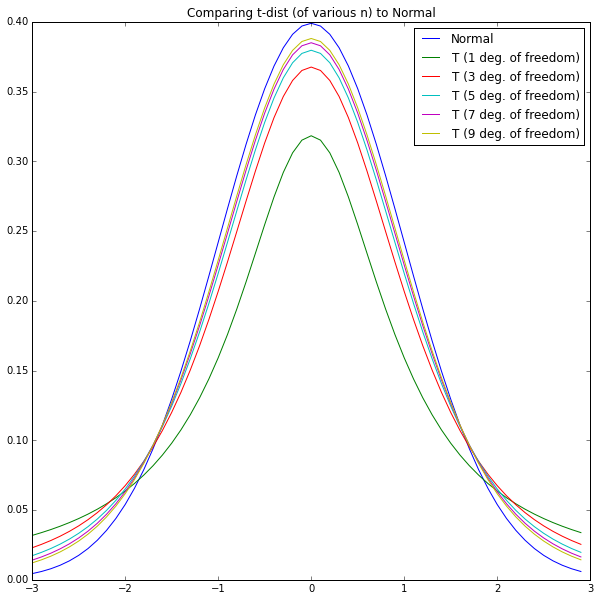

In [66]:
x = np.arange(-3, 3, 0.1)
norm_array = norm.pdf(x)
plt.plot(x, norm_array, label = 'Normal')

for n in [1,3,5,7,9]:
    t_array = t.pdf(x, df = n)
    plt.plot(x, t_array, label = 'T ({} deg. of freedom)'.format(n))
plt.legend(loc = 'upper right')
plt.title('Comparing t-dist (of various n) to Normal')
plt.show()

## We can see that once $n\geq 9$ the t-distribution gets pretty close to the normal